In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')

Predicting stock price using the Close price and a Moving Average techincal indicator.

We are using regression for this, because we are looking for a specific value. Not a "Yes, No" etc, that you want when using classification.



In [137]:
df = pd.read_csv("https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment2-machinelearning/TSLA.csv", sep=',')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2840,2021-10-08,796.210022,796.380005,780.909973,785.489990,785.489990,16711100
2841,2021-10-11,787.650024,801.239990,785.500000,791.940002,791.940002,14200300
2842,2021-10-12,800.929993,812.320007,796.570007,805.719971,805.719971,22020000
2843,2021-10-13,810.469971,815.409973,805.780029,811.080017,811.080017,14120100


In [138]:
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)
df.shape

(2845, 7)

In [139]:
data = df.filter(['Close'])
data

,Close
Date,
2010-06-29,4.778000
2010-06-30,4.766000
2010-07-01,4.392000
2010-07-02,3.840000
2010-07-06,3.222000
...,...
2021-10-08,785.489990
2021-10-11,791.940002
2021-10-12,805.719971


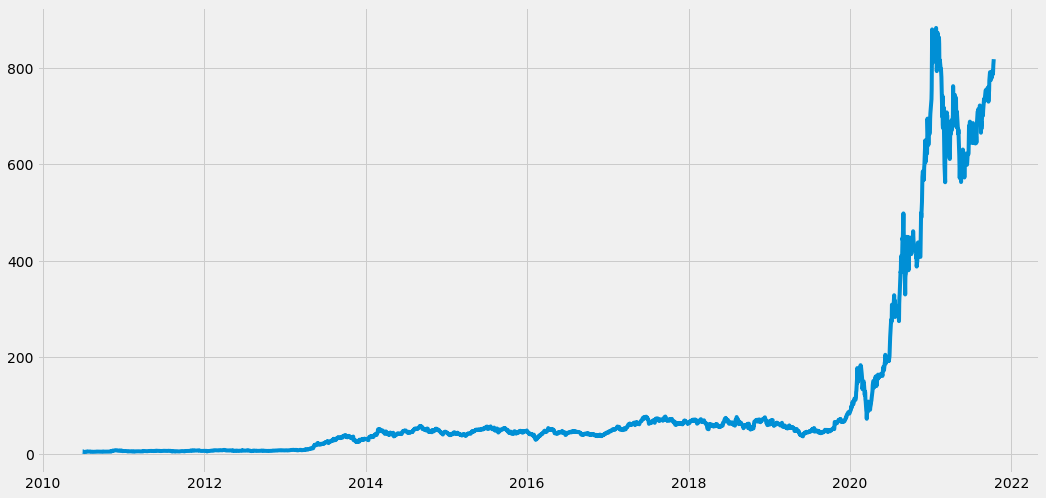

In [140]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'])
plt.show()

In [141]:
data['MA'] = data.rolling(window=12).mean()
data=data.dropna()
data

,Close,MA
Date,,
2010-07-15,3.978000,3.842833
2010-07-16,4.128000,3.788667
2010-07-19,4.382000,3.756667
2010-07-20,4.060000,3.729000
2010-07-21,4.044000,3.746000
...,...,...
2021-10-08,785.489990,779.410833
2021-10-11,791.940002,782.602498
2021-10-12,805.719971,785.213328


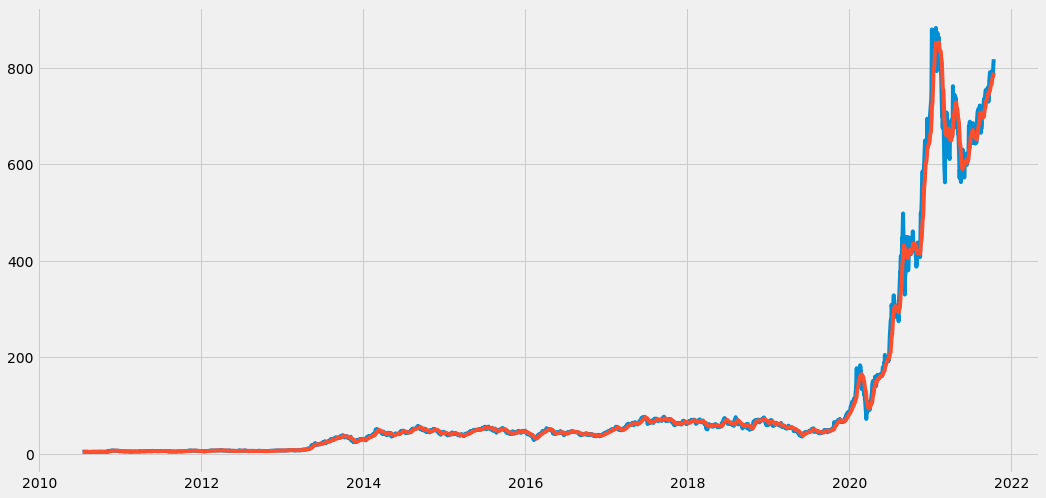

In [142]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'])
plt.plot(data['MA'])
plt.show()

In [143]:
X_train, X_test, y_train, y_test = train_test_split(data[['Close']], data[['MA']], test_size=.33)

In [144]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_train)  # make predictions

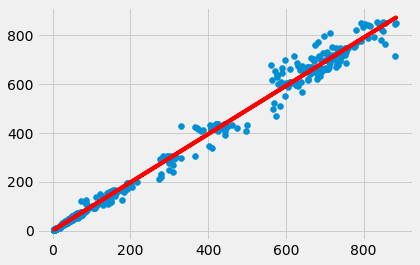

MSE = 188.3081853694935


In [145]:
plt.scatter(X_train, y_train)
plt.plot(X_train, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred)))

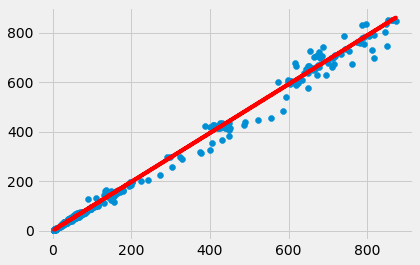

MSE = 176.4209509019574


In [146]:

Y_pred = linear_regressor.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_test,Y_pred)))

In [147]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", linear_regressor.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, Y_pred))
print("Coefficient of Determination:", r2_score(y_test, Y_pred))

Model Coefficients: [[0.98650879]]
Mean Absolute Error: 5.135584835130648
Coefficient of Determination: 0.9950662237425123


In [148]:
predictions = linear_regressor.predict(X_test)

In [149]:
data_test = X_test
data_test['Close'] = predictions
data_test.sort_index()

,Close
Date,
2010-07-30,4.200854
2010-08-03,4.597430
2010-08-06,4.131798
2010-08-09,4.133771
2010-08-12,3.739167
...,...
2021-10-05,770.325582
2021-10-08,775.159439
2021-10-11,781.522433


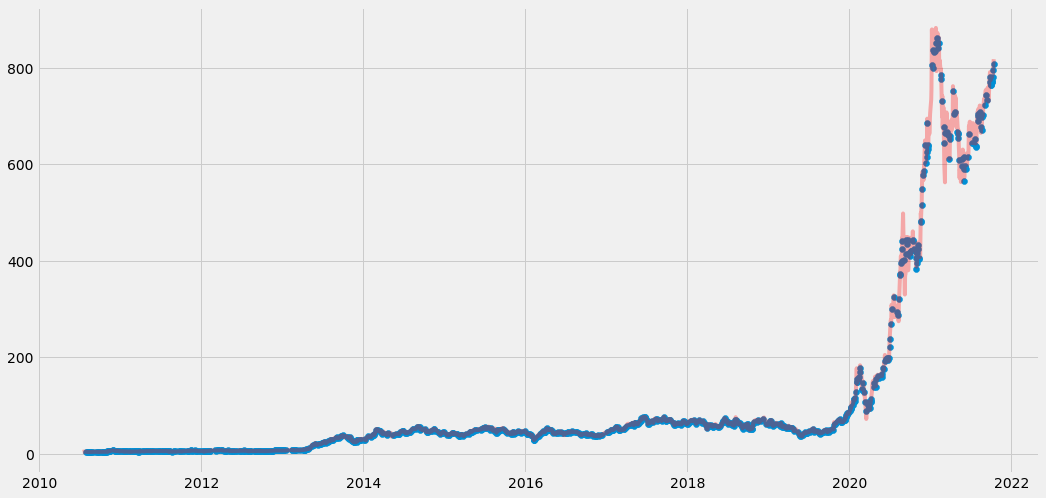

In [150]:
data_test['Dates'] = data_test.index
plt.figure(figsize=(16,8))
plt.scatter(data_test['Dates'], data_test['Close'])
plt.plot(data['Close'], color='red', alpha=0.3)
plt.show()

Actual close price in red line, and prediction is the blue dots.

In [151]:
def predict_price(date):
  try:
    x = np.array(data_test.loc[date, :])
    y = np.array(data.loc[date, :])
    return "Prediction: " + str(x[0][0]) + " Actual: " + str(y[0])
  except:
    return "Data not available"

In [152]:
predict_price('2016-10-14')

'Prediction: 39.03842308251019 Actual: 39.301998'